In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the dataset from kaggle

In [6]:
# kaggle API
!kaggle competitions download -c dogs-vs-cats

 99% 801M/812M [00:05<00:00, 122MB/s]
100% 812M/812M [00:05<00:00, 161MB/s]


In [7]:
ls

dogs-vs-cats.zip  kaggle.json  sample_data/


In [8]:
# Extracting the compressed dataset

from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The dataset has been extracted.")

The dataset has been extracted.


In [9]:
# Extracting the compressed dataset

from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The dataset has been extracted.")

The dataset has been extracted.


In [10]:
import os

# Counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
print(len(files))

25000


In [11]:
file_names = os.listdir('/content/train')
print(file_names)

['dog.6541.jpg', 'cat.4269.jpg', 'dog.2134.jpg', 'dog.5498.jpg', 'dog.9991.jpg', 'dog.713.jpg', 'dog.1383.jpg', 'dog.7618.jpg', 'cat.9033.jpg', 'cat.9451.jpg', 'dog.2510.jpg', 'cat.3443.jpg', 'dog.11372.jpg', 'dog.2208.jpg', 'cat.11698.jpg', 'dog.4157.jpg', 'cat.3411.jpg', 'cat.4209.jpg', 'cat.8060.jpg', 'cat.1496.jpg', 'dog.6009.jpg', 'dog.4370.jpg', 'cat.5090.jpg', 'cat.11356.jpg', 'dog.742.jpg', 'dog.5959.jpg', 'cat.11444.jpg', 'cat.6866.jpg', 'cat.9462.jpg', 'cat.586.jpg', 'dog.11244.jpg', 'cat.11256.jpg', 'dog.8169.jpg', 'cat.5419.jpg', 'dog.9186.jpg', 'cat.9301.jpg', 'dog.3753.jpg', 'cat.1326.jpg', 'cat.4763.jpg', 'dog.9060.jpg', 'cat.11611.jpg', 'dog.10885.jpg', 'cat.6619.jpg', 'dog.2529.jpg', 'dog.655.jpg', 'cat.1189.jpg', 'cat.9804.jpg', 'dog.2288.jpg', 'dog.281.jpg', 'dog.11478.jpg', 'cat.7408.jpg', 'cat.2221.jpg', 'cat.2958.jpg', 'cat.1427.jpg', 'dog.10386.jpg', 'dog.7167.jpg', 'dog.11698.jpg', 'cat.6335.jpg', 'dog.2247.jpg', 'cat.3410.jpg', 'dog.12230.jpg', 'dog.7278.jpg', 

Importing the dependencies

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from sklearn.model_selection import train_test_split
import cv2
from google.colab.patches import cv2_imshow

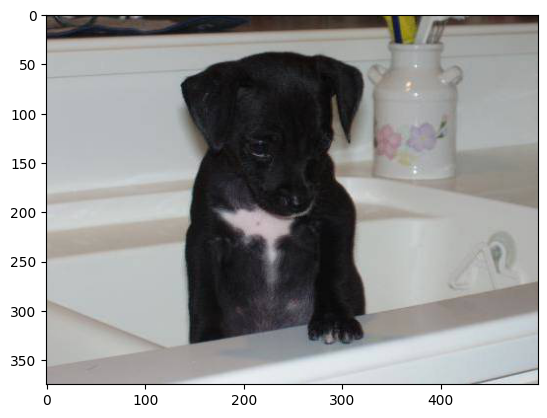

In [13]:
# Displaying the images
img = mpimg.imread('/content/train/dog.8298.jpg')
plt.imshow(img)

In [14]:
file_names = os.listdir('/content/train')

dc = 0
cc = 0

for i in file_names:
  if(i[0:3] == 'dog'):
    dc = dc + 1
  else:
    cc = cc + 1

print("Number of dogs: ", dc)
print("Number of cats: ", cc)

Number of dogs:  12500
Number of cats:  12500


In [15]:
# Creating a directory for resized images
os.mkdir('/content/image resized')

In [16]:
og_folder = '/content/train/'
resized_folder = '/content/image resized/'

In [27]:
for i in range(2000):
  filename = os.listdir(og_folder)[i]
  img_path = og_folder + filename

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')
  
  new_img_path = resized_folder + filename
  img.save(new_img_path)

In [28]:
len('/content/image resized')

22

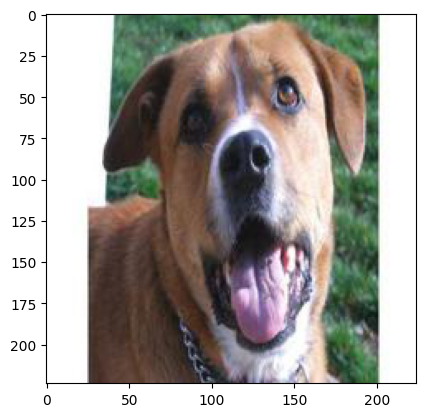

In [23]:
img = mpimg.imread('/content/image resized/dog.6541.jpg')
plt.imshow(img)

Creating labels for resized images

Cat - 0
Dog - 1

In [30]:
labels = []
file_names = os.listdir('/content/image resized/')
for i in range(2000):
  filename = file_names[i]
  label = filename[0:3]
  if(label == 'dog'):
    labels.append(1)
  else:
    labels.append(0)

In [31]:
file_names[0:5]

['dog.6541.jpg',
 'cat.4269.jpg',
 'dog.2134.jpg',
 'dog.5498.jpg',
 'dog.9991.jpg']

In [32]:
labels[0:5]

[1, 0, 1, 1, 1]

In [33]:
len(labels)

2000

In [35]:
dc = 0
cc = 0
for i in labels:
  if i==1:
    dc+=1
  else:
    cc+=1

In [36]:
dc, cc

(1018, 982)

In [38]:
import cv2
import glob

In [39]:
image_dir = '/content/image resized/'
img_extension = ['png','jpg']

files = []

[files.extend(glob.glob(image_dir + "*." + e)) for e in img_extension]

dog_cat_images = np.asarray([cv2.imread(i) for i in files])

In [40]:
type(dog_cat_images)

numpy.ndarray

In [41]:
dog_cat_images.shape

(2000, 224, 224, 3)

In [42]:
X = dog_cat_images
Y = np.asarray(labels)

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

Scaling the data

In [44]:
X_train = X_train/255
X_test = X_test/255

#Building the Neural Network

In [46]:
import tensorflow as tf
import tensorflow_hub as hub

In [47]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape = (224, 224, 3), trainable = False)

In [48]:
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(2)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [49]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

In [51]:
model.fit(X_train, Y_train, epochs = 5)

Epoch 1/5
50/50 [==============================] - 70s 1s/step - loss: 0.0861 - accuracy: 0.9688
Epoch 2/5
50/50 [==============================] - 65s 1s/step - loss: 0.0559 - accuracy: 0.9837
Epoch 3/5
50/50 [==============================] - 67s 1s/step - loss: 0.0452 - accuracy: 0.9869
Epoch 4/5
50/50 [==============================] - 64s 1s/step - loss: 0.0377 - accuracy: 0.9912
Epoch 5/5
50/50 [==============================] - 63s 1s/step - loss: 0.0298 - accuracy: 0.9937


In [52]:
loss, accuracy = model.evaluate(X_test, Y_test)

13/13 [==============================] - 20s 1s/step - loss: 0.0649 - accuracy: 0.9725


In [53]:
loss, accuracy

(0.06486713141202927, 0.9725000262260437)

# Building a predictive system

/content/Dog_Breeds.jpg


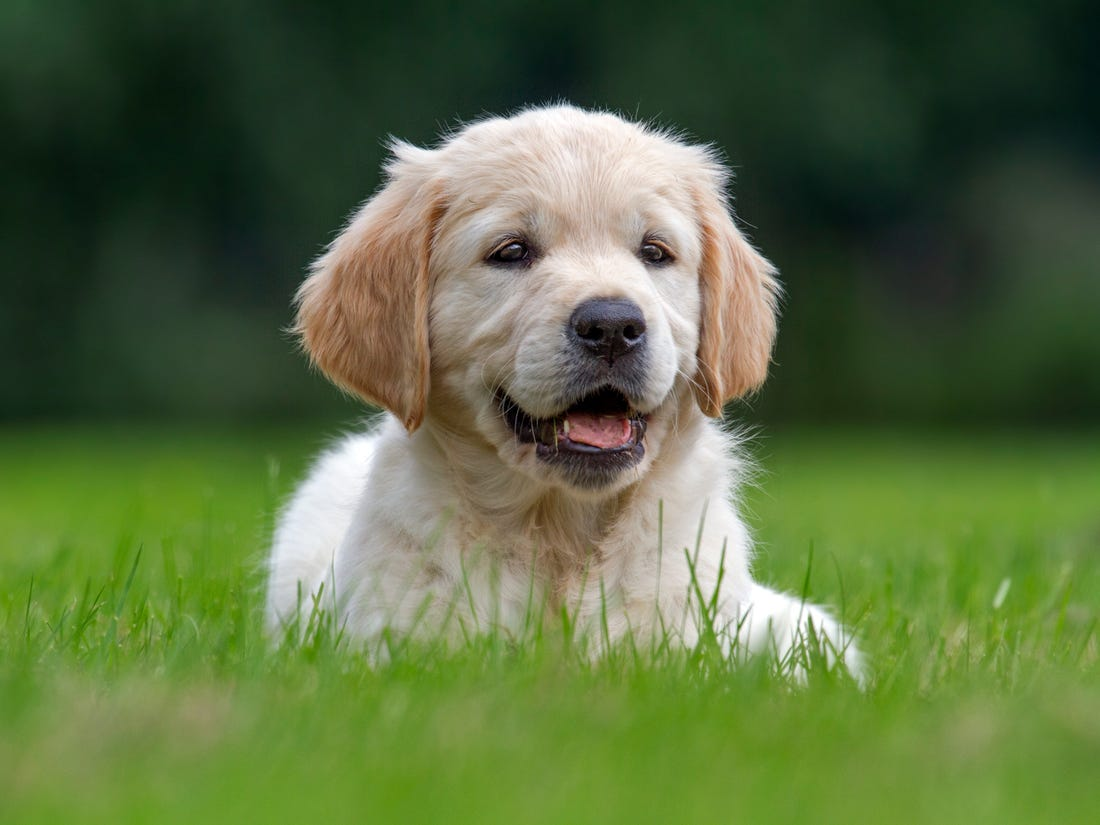

1/1 [==============================] - 0s 87ms/step
Dog


In [59]:
input_image_path = input()
inp_img = cv2.imread(input_image_path)
cv2_imshow(inp_img)
resized_img = cv2.resize(inp_img, (224,224))
scaled_img = resized_img/255
reshaped_img = np.reshape(scaled_img, [1,224,224,3])

prediction = model.predict(reshaped_img)
label = np.argmax(prediction)

if label == 0:
  print('Cat')
else:
  print('Dog')